# Green Hydrogen Sentiment Analysis

With green hydrogen emerging as a pivotal renewable energy solution, it's essential to assess public sentiment to drive informed decision-making and policy development. This sentiment analysis evaluates public discourse, identifies key influencers, and monitors trends that may impact the adoption of green hydrogen. By leveraging data-driven insights, this project aims to support policymakers, industry leaders, and researchers in addressing concerns, amplifying positive engagement, and accelerating the global shift toward sustainable energy solutions.

## Installing libraries

In [ ]:
!pip install requests
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install selenium
!pip install gspread
!pip install -q transformers
!pip install emoji
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 

## Making necessary imports

In [ ]:
import time
import requests
import pandas as pd
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from transformers import pipeline
from flair.data import Sentence
from flair.models import SequenceTagger
import matplotlib.pyplot as plt

## Initiating organization NER function

In [ ]:
org_names = ""
def organization_ner(text):
  tagger = SequenceTagger.load("flair/ner-english-large")
  sentence = Sentence(text)
  tagger.predict(sentence)
  for entity in sentence.get_spans('ner'):
      if entity.tag == "ORG":
        return entity.text

## Initiating Web Driver 1, for CNBC

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

driver = web_driver()
driver.get('https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen')
WebDriverWait(driver, 5)

<selenium.webdriver.support.wait.WebDriverWait (session="5316b1c9494075919dd5327307bd91ba")>

## Extracting CNBC data

In [ ]:
titles = []
dates = []
src = []
last_height = driver.execute_script("return document.body.scrollHeight")
itemTargetCount = 20

ctSelector = 'div.SearchResult-searchResultContent'

WebDriverWait(driver, 5).until(EC.visibility_of_all_elements_located(
          (By.CSS_SELECTOR, ctSelector)))

while itemTargetCount > len(titles):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(1)
    new_height = driver.execute_script("return document.body.scrollHeight")
    last_height = new_height

    cardContainers = driver.find_elements(By.CSS_SELECTOR, ctSelector)
    t1 = []
    t2 = []
    s1=[]
    for container in cardContainers:
        #title
        title_element = container.find_element(By.CSS_SELECTOR, '.SearchResult-searchResultTitle')
        title_text = title_element.text
        t1.append(title_text)

        #date
        date_element = container.find_element(By.CSS_SELECTOR, '.SearchResult-publishedDate')
        date_text = date_element.text
        date_format = "%m/%d/%Y %I:%M:%S %p"
        parsed_date = datetime.strptime(date_text, date_format)
        t2.append(parsed_date)

        #src
        s1.append('https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen')

    titles = t1
    dates = t2
    src = s1

print(titles,dates)
print(len(titles),len(dates),len(src))

driver.quit()

['Saudi Arabia’s ACWA Power to develop largest green hydrogen project in Indonesia worth over $1 ...', '‘Europe does not have an incentive program’ for green hydrogen, says Clariant CEO', 'TES CEO: 2024 must be a year of delivery for green goals', 'The hydrogen stock bubble burst, but Bernstein says it’s time for a second look at ...', 'Here are Wednesday’s biggest analyst calls: Apple, Tesla, Alphabet, Microsoft, AMD, Meta, Spotify and more', '‘We need everything’: CEO on why natural gas infrastructure needs to be ready for clean ...', 'There’s a lot of talk about hydrogen’s potential. But transportation costs represent a big challenge', 'Biden’s Inflation Reduction Act makes green hydrogen profitable at scale, Goldman Sachs says', 'In Australia, firms plan ‘super hub’ to produce green hydrogen using wind and solar', 'This green hydrogen stock can rally more than 20%, says Citi', 'Green hydrogen corridor aims to harness Spanish sunshine and decarbonize Europe’s industrial north', 'Cre

## Initiating Web Driver 2, for Google Search

In [ ]:
def web_driver2():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

driver2 = web_driver2()
driver2.get('https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en')
WebDriverWait(driver2, 10).until(EC.presence_of_element_located((By.XPATH, "//item")))

items = driver2.find_elements(By.XPATH, "//item")
print(items)

max_i = 20
app_i = 0

for item in items:

    if app_i == max_i:
      break

    title_element = item.find_element(By.XPATH, ".//title")
    pub_date_element = item.find_element(By.XPATH, ".//pubDate")
    title = title_element.get_attribute("textContent")

    pub_date = pub_date_element.get_attribute("textContent")
    date_format = "%a, %d %b %Y %H:%M:%S %Z"
    parsed_date = datetime.strptime(pub_date, date_format)


    if "green hydrogen" in title.lower():
      titles.append(title)
      dates.append(parsed_date)
      src.append('https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en')
      app_i+=1

driver2.quit()

[<selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_11")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_12")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_13")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_14")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_15")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b", element="26990285A198CF22313688AB454DB4B4_element_16")>, <selenium.webdriver.remote.webelement.WebElement (session="ccac044fe58fae621cc18b4540b9e04b",

In [ ]:
print(len(titles),len(dates),len(src))

40 40 40


## Converting data to dataframe & Sentiment Analysis

In [ ]:
print(len(titles),len(dates),len(src))
df = pd.DataFrame({'Title': titles, 'Date': dates,"Source":src})

def get_bertweet_sentiment_score(text):
  specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
  result = specific_model(text)
  return result[0]['score']

df['Sentiment Score'] = df['Title'].apply(get_bertweet_sentiment_score)

40 40 40


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
df

,Title,Date,Source,Sentiment Score
0,Saudi Arabia’s ACWA Power to develop largest g...,2024-01-29 08:10:42,https://www.cnbc.com/search/?query=green%20hyd...,0.872736
1,‘Europe does not have an incentive program’ fo...,2024-01-17 15:07:08,https://www.cnbc.com/search/?query=green%20hyd...,0.590377
2,TES CEO: 2024 must be a year of delivery for g...,2024-01-15 12:37:50,https://www.cnbc.com/search/?query=green%20hyd...,0.600250
3,"The hydrogen stock bubble burst, but Bernstein...",2023-08-11 19:18:35,https://www.cnbc.com/search/?query=green%20hyd...,0.941269
4,Here are Wednesday’s biggest analyst calls: Ap...,2024-01-31 13:20:15,https://www.cnbc.com/search/?query=green%20hyd...,0.512493
5,‘We need everything’: CEO on why natural gas i...,2023-11-09 10:00:18,https://www.cnbc.com/search/?query=green%20hyd...,0.913564
6,There’s a lot of talk about hydrogen’s potenti...,2023-07-04 08:20:24,https://www.cnbc.com/search/?query=green%20hyd...,0.626521
7,Biden’s Inflation Reduction Act makes green hy...,2022-11-30 13:11:51,https://www.cnbc.com/search/?query=green%20hyd...,0.662128
8,"In Australia, firms plan ‘super hub’ to produc...",2022-11-16 00:02:17,https://www.cnbc.com/search/?query=green%20hyd...,0.665265
9,This green hydrogen stock can rally more than ...,2023-07-06 09:45:47,https://www.cnbc.com/search/?query=green%20hyd...,0.880808


## Plotting graphs for Week Wise Trend of Avg. Sentiment Score

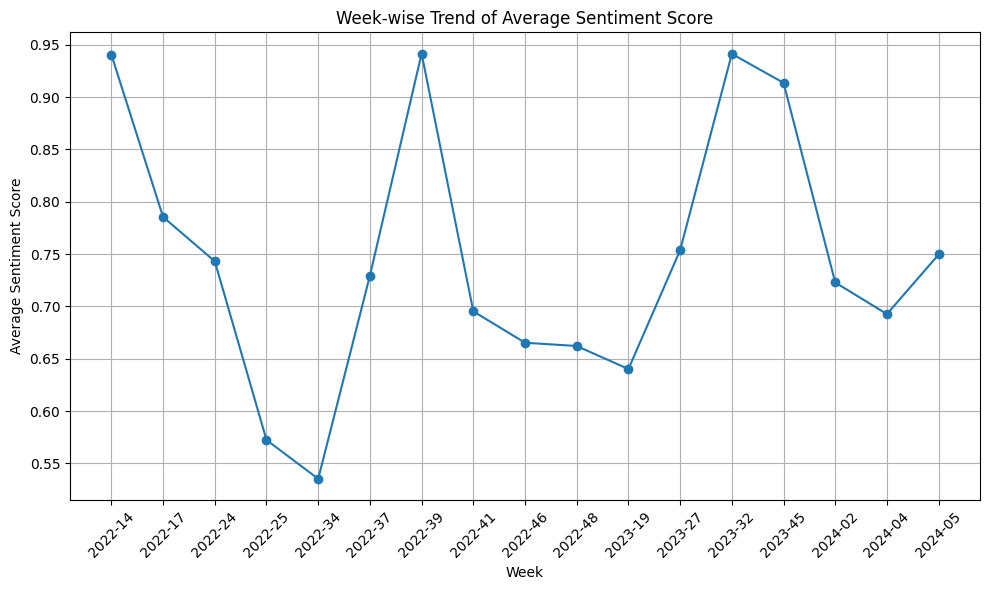

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Week'] = df['Date'].dt.strftime('%Y-%U')
weekly_avg_sentiment = df.groupby('Week')['Sentiment Score'].mean()

plt.figure(figsize=(10, 6))
plt.plot(weekly_avg_sentiment.index, weekly_avg_sentiment.values, marker='o')
plt.title('Week-wise Trend of Average Sentiment Score')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for title in titles:
  org = organization_ner(title)
  if org is not None:
    org_names += " " + org
print(org_names)

pytorch_model.bin:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

2024-02-08 15:23:32,895 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
2024-02-08 15:23:53,221 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
2024-02-08 15:24:12,712 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
2024-02-08 15:24:32,009 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
2024-02-08 15:24:52,236 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-

## Word Cloud for most occuring organization names in the headlines

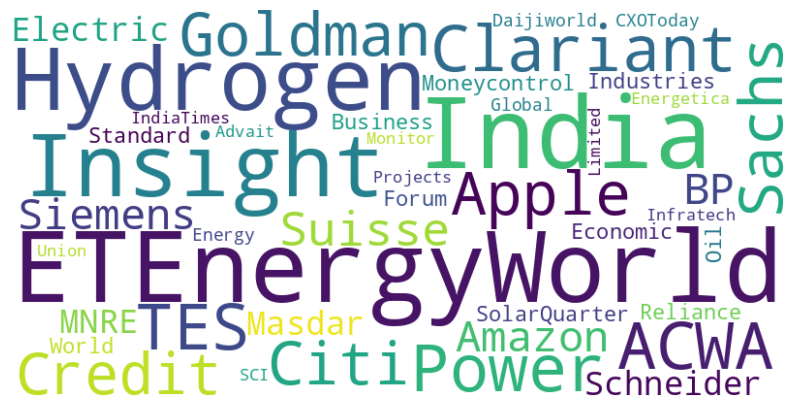

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(org_names)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Converting dataset to Google Sheet

In [ ]:
df

,Title,Date,Source,Sentiment Score,Week
0,Saudi Arabia’s ACWA Power to develop largest g...,01/29/2024 08:10:42 AM,https://www.cnbc.com/search/?query=green%20hyd...,0.872736,2024-04
1,‘Europe does not have an incentive program’ fo...,01/17/2024 03:07:08 PM,https://www.cnbc.com/search/?query=green%20hyd...,0.590377,2024-02
2,TES CEO: 2024 must be a year of delivery for g...,01/15/2024 12:37:50 PM,https://www.cnbc.com/search/?query=green%20hyd...,0.600250,2024-02
3,"The hydrogen stock bubble burst, but Bernstein...",08/11/2023 07:18:35 PM,https://www.cnbc.com/search/?query=green%20hyd...,0.941269,2023-32
4,Here are Wednesday’s biggest analyst calls: Ap...,01/31/2024 01:20:15 PM,https://www.cnbc.com/search/?query=green%20hyd...,0.512493,2024-04
5,‘We need everything’: CEO on why natural gas i...,11/09/2023 10:00:18 AM,https://www.cnbc.com/search/?query=green%20hyd...,0.913564,2023-45
6,There’s a lot of talk about hydrogen’s potenti...,07/04/2023 08:20:24 AM,https://www.cnbc.com/search/?query=green%20hyd...,0.626521,2023-27
7,Biden’s Inflation Reduction Act makes green hy...,11/30/2022 01:11:51 PM,https://www.cnbc.com/search/?query=green%20hyd...,0.662128,2022-48
8,"In Australia, firms plan ‘super hub’ to produc...",11/16/2022 12:02:17 AM,https://www.cnbc.com/search/?query=green%20hyd...,0.665265,2022-46
9,This green hydrogen stock can rally more than ...,07/06/2023 09:45:47 AM,https://www.cnbc.com/search/?query=green%20hyd...,0.880808,2023-27


Please create a "goindiastocks-sheet" sheet in drive before running this cell.

In [ ]:
from google.colab import auth
from google.auth import default

try:
  import gspread
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install gspread
  import gspread


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

try:
  worksheet = gc.open("goindiastocks-sheet")
except:
  worksheet = gc.create("goindiastocks-sheet")
  sheet1 = gc.open("goindiastocks-sheet").sheet1

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y %I:%M:%S %p')

sheet1.update([df.columns.values.tolist()] + df.fillna(-1).values.tolist())


{'spreadsheetId': '1kPSLRG-kviTw-3JyJXCgWZ56rCqtfV_ozuYvST0nZL8',
 'updatedRange': 'Sheet1!A1:E41',
 'updatedRows': 41,
 'updatedColumns': 5,
 'updatedCells': 205}

In [ ]:
worksheet.share(None, perm_type='anyone', role='reader')
worksheet_url = worksheet.url
print(worksheet_url)

https://docs.google.com/spreadsheets/d/1kPSLRG-kviTw-3JyJXCgWZ56rCqtfV_ozuYvST0nZL8
